<a href="https://colab.research.google.com/github/Jagenheixer/rasp-projekti/blob/5VK/viikko5katariina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteraatio 0, centroidit:
[[1516 1551 1854]
 [1537 1377 1686]
 [1835 1533 1537]
 [1538 1376 1363]
 [1361 1539 1411]
 [1531 1788 1581]]

Iteraatio 1, centroidit:
[[1534 1536 1832]
 [1533 1232 1548]
 [1838 1536 1537]
 [1537 1466 1298]
 [1234 1536 1538]
 [1532 1834 1534]]

Iteraatio 2, centroidit:
[[1534 1536 1832]
 [1534 1234 1537]
 [1838 1536 1537]
 [1536 1535 1234]
 [1234 1536 1538]
 [1532 1834 1534]]

Iteraatio 3, centroidit:
[[1534 1536 1832]
 [1534 1234 1537]
 [1838 1536 1537]
 [1536 1535 1234]
 [1234 1536 1538]
 [1532 1834 1534]]

Iteraatio 4, centroidit:
[[1534 1536 1832]
 [1534 1234 1537]
 [1838 1536 1537]
 [1536 1535 1234]
 [1234 1536 1538]
 [1532 1834 1534]]

Iteraatio 5, centroidit:
[[1534 1536 1832]
 [1534 1234 1537]
 [1838 1536 1537]
 [1536 1535 1234]
 [1234 1536 1538]
 [1532 1834 1534]]

Iteraatio 6, centroidit:
[[1534 1536 1832]
 [1534 1234 1537]
 [1838 1536 1537]
 [1536 1535 1234]
 [1234 1536 1538]
 [1532 1834 1534]]

Iteraatio 7, centroidit:
[[1534 1536 1832]
 [1534 1234 

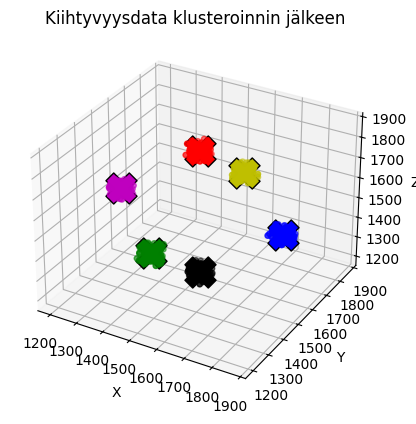

Centroidit ja lähin alkuperäinen klusteri:
Centroid 0: [1534 1536 1832], lähin alkuperäinen klusteri: 4 ([1500 1500 1800])
Centroid 1: [1534 1234 1537], lähin alkuperäinen klusteri: 3 ([1500 1200 1500])
Centroid 2: [1838 1536 1537], lähin alkuperäinen klusteri: 0 ([1800 1500 1500])
Centroid 3: [1536 1535 1234], lähin alkuperäinen klusteri: 5 ([1500 1500 1200])
Centroid 4: [1234 1536 1538], lähin alkuperäinen klusteri: 1 ([1200 1500 1500])
Centroid 5: [1532 1834 1534], lähin alkuperäinen klusteri: 2 ([1500 1800 1500])
Keskipiste 0: [1838 1536 1537]
Keskipiste 1: [1234 1536 1538]
Keskipiste 2: [1532 1834 1534]
Keskipiste 3: [1534 1234 1537]
Keskipiste 4: [1534 1536 1832]
Keskipiste 5: [1536 1535 1234]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. LUODAAN TESTIDATA (6 klusteria: X+, X-, Y+, Y-, Z+, Z-)
K = 6                   # klustereiden lukumäärä
N_per_cluster = 100     # pisteitä per klusteri
noise = 70              # hajonta

# Data sisältää myös klusteri-ID:n neljännessä sarakkeessa
data = np.zeros((K*N_per_cluster, 4))
data[0:100, :] = np.array([1800, 1500, 1500, 0])
data[100:200, :] = np.array([1200, 1500, 1500, 1])
data[200:300, :] = np.array([1500, 1800, 1500, 2])
data[300:400, :] = np.array([1500, 1200, 1500, 3])
data[400:500, :] = np.array([1500, 1500, 1800, 4])
data[500:600, :] = np.array([1500, 1500, 1200, 5])

# Lisätään satunnaista kohinaa
data[:, 0:3] += noise * np.random.rand(K*N_per_cluster, 3)

X_data = data[:, 0:3]   # 3D-koordinaatit
y_data = data[:, 3]     # klusteri-ID:t
N = K * N_per_cluster   # kokonaispisteiden määrä

# 2. APUFUNKTIOT
def distance_3d(a, b):
    """Laskee euklidisen etäisyyden kahden 3D-pisteen välillä."""
    return np.linalg.norm(a - b)

# 3. K-MEANS: ALUSTUS
Min = int(np.min(X_data))
Max = int(np.max(X_data))
centroids = np.random.randint(Min, Max, size=(K, 3))

# Varataan taulukot Step 2:lle
sums = np.zeros((K, 3)) # summataan pisteet voittajaa kohti
counts = np.zeros(K)    # lasketaan kuinka monta pistettä kukin klusteri voittaa
distances = np.zeros(K) # etäisyys kuhunkin centroidiin

# 4. K-MEANS: ITERAATIOT
num_iterations = 10

for iteration in range(num_iterations):
    sums[:] = 0
    counts[:] = 0

    # STEP 1: FIND WINNER FOR EACH POINT
    for row in X_data: # Lasketaan etäisyys kaikkiin centroidiin
        for c in range(K):
            distances[c] = distance_3d(row, centroids[c]) # Valitaan lähin centroid = voittaja
        winner = np.argmin(distances) # Lisätään piste summiin ja kasvatetaan laskuria
        sums[winner] += row
        counts[winner] += 1

    # STEP 2: UPDATE CENTROIDS
    for c in range(K):
        if counts[c] > 0: # Uusi keskipiste = kaikkien voittopisteiden keskiarvo
            centroids[c] = sums[c] / counts[c]
        else: # Jos klusterilla ei yhtään pistettä, arvotaan uusi satunnainen keskipiste
            centroids[c] = np.random.randint(Min, Max, size=(3,))

    print(f"Iteraatio {iteration}, centroidit:\n{centroids}\n") # Tulostetaan centroidien paikat iteraation jälkeen

# 5. PIIRRETÄÄN DATABILVI KLUSTEREITTAIN
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Värit klustereille
colors = ['r', 'g', 'b', 'k', 'm', 'y']

# Määritetään jokaiselle pisteelle voittajaklusteri labels-taulukkoon
labels = np.zeros(N, dtype=int)
for i, row in enumerate(X_data):
    dists = np.array([distance_3d(row, c) for c in centroids])
    labels[i] = np.argmin(dists)

# Piirretään pisteet klustereittain
for k in range(K):
    cluster_points = X_data[labels == k]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
               s=15, color=colors[k], label=f"Cluster {k}")

for k in range(K):
    ax.scatter(centroids[k, 0], centroids[k, 1], centroids[k, 2],
               s=500, color=colors[k], marker='X', edgecolor='k')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Kiihtyvyysdata klusteroinnin jälkeen")
plt.show()

original_centers = np.array([
    [1800, 1500, 1500],  # X+
    [1200, 1500, 1500],  # X-
    [1500, 1800, 1500],  # Y+
    [1500, 1200, 1500],  # Y-
    [1500, 1500, 1800],  # Z+
    [1500, 1500, 1200],  # Z-
])
# Tulostetaan centroidit ja lähin alkuperäinen klusteri
print("Centroidit ja lähin alkuperäinen klusteri:")
for i, centroid in enumerate(centroids): # Lasketaan etäisyydet kaikkiin alkuperäisiin keskuksiin
    dists = np.linalg.norm(original_centers - centroid, axis=1)
    closest = np.argmin(dists)
    print(f"Centroid {i}: {centroid}, lähin alkuperäinen klusteri: {closest} ({original_centers[closest]})")


# 6. Luodaan CP-taulukko C-headeriä varten
num_clusters = centroids.shape[0]

# Selvitetään mappi: mille alkuperäiselle keskukselle kukin centroidi on lähin
closest_orig = np.zeros(num_clusters, dtype=int)   # alkuperäinen index per centroidi
for i, centroid in enumerate(centroids):
    dists = np.linalg.norm(original_centers - centroid, axis=1)
    closest_orig[i] = np.argmin(dists)

# Tehdään taulukko, jossa indeksi 0..5 vastaa:
# 0: X+, 1: X-, 2: Y+, 3: Y-, 4: Z+, 5: Z-
CP = np.zeros((num_clusters, 3), dtype=int)

for orig_idx in range(num_clusters):
    # centroidin indeksi, joka on lähinnä tätä alkuperäistä klusteria
    cent_idx = np.where(closest_orig == orig_idx)[0][0]
    CP[orig_idx] = np.round(centroids[cent_idx]).astype(int)

# Tallenna C-headeriin
with open("keskipisteet.h", "w") as f:
    f.write("// Tämä tiedosto generoitu Pythonilla\n")
    f.write("int CP[{}][3] = {{\n".format(num_clusters))

    for i, row in enumerate(CP):
        line = "    {{{}, {}, {}}}".format(row[0], row[1], row[2])
        if i != num_clusters - 1:
            line += ","
        line += "  // Keskipiste {} ({}-klusteri)\n".format(i+1, i)
        f.write(line)

    f.write("};\n")

# Varmuustulostus
for i, row in enumerate(CP):
    print(f"Keskipiste {i}: {row}")